In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import pprint
# Import API key
from config import apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

In [41]:
url = "https://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": apikey,
    "q": "",
    "units": "metric"
}
city_data = pd.DataFrame()
print("Beginning Data Retrieval \n ------------------")
for i, city in enumerate(cities):
    params["q"] = city
    print(f"Processing record {i+1} of {len(cities)}")
    try:
        req = requests.get(url,params)
        #print(pd.read_json(req.json()))
        req_json = req.json()
        city_data.loc[i,"City"] = city
        city_data.loc[i,"Lat"] = req_json["coord"]["lat"]
        city_data.loc[i,"Lng"] = req_json["coord"]["lon"]
        city_data.loc[i,"Max Temp"] = req_json["main"]["temp_max"]
        city_data.loc[i,"Humidity"] = req_json["main"]["humidity"]
        city_data.loc[i,"Cloudiness"] = req_json["clouds"]["all"]
        city_data.loc[i,"Wind Speed"] = req_json["main"]["temp_max"]
        city_data.loc[i,"Country"] = req_json["sys"]["country"]
        city_data.loc[i,"Date"] = req_json["dt"]
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval 
 ------------------
Processing record 1 of 609
Processing record 2 of 609
Processing record 3 of 609
Processing record 4 of 609
Processing record 5 of 609
Processing record 6 of 609
Processing record 7 of 609
Processing record 8 of 609
Processing record 9 of 609
City not found. Skipping...
Processing record 10 of 609
Processing record 11 of 609
Processing record 12 of 609
Processing record 13 of 609
Processing record 14 of 609
Processing record 15 of 609
Processing record 16 of 609
Processing record 17 of 609
Processing record 18 of 609
Processing record 19 of 609
Processing record 20 of 609
Processing record 21 of 609
Processing record 22 of 609
Processing record 23 of 609
City not found. Skipping...
Processing record 24 of 609
Processing record 25 of 609
Processing record 26 of 609
Processing record 27 of 609
Processing record 28 of 609
Processing record 29 of 609
Processing record 30 of 609
Processing record 31 of 609
Processing record 32 of 609
Processing 

Processing record 263 of 609
Processing record 264 of 609
Processing record 265 of 609
Processing record 266 of 609
Processing record 267 of 609
Processing record 268 of 609
Processing record 269 of 609
Processing record 270 of 609
Processing record 271 of 609
Processing record 272 of 609
Processing record 273 of 609
Processing record 274 of 609
Processing record 275 of 609
Processing record 276 of 609
Processing record 277 of 609
Processing record 278 of 609
Processing record 279 of 609
Processing record 280 of 609
Processing record 281 of 609
Processing record 282 of 609
Processing record 283 of 609
Processing record 284 of 609
Processing record 285 of 609
Processing record 286 of 609
Processing record 287 of 609
Processing record 288 of 609
Processing record 289 of 609
Processing record 290 of 609
Processing record 291 of 609
Processing record 292 of 609
City not found. Skipping...
Processing record 293 of 609
Processing record 294 of 609
Processing record 295 of 609
Processing reco

Processing record 527 of 609
Processing record 528 of 609
Processing record 529 of 609
City not found. Skipping...
Processing record 530 of 609
City not found. Skipping...
Processing record 531 of 609
Processing record 532 of 609
Processing record 533 of 609
City not found. Skipping...
Processing record 534 of 609
Processing record 535 of 609
Processing record 536 of 609
Processing record 537 of 609
City not found. Skipping...
Processing record 538 of 609
Processing record 539 of 609
Processing record 540 of 609
Processing record 541 of 609
Processing record 542 of 609
Processing record 543 of 609
Processing record 544 of 609
Processing record 545 of 609
Processing record 546 of 609
Processing record 547 of 609
Processing record 548 of 609
Processing record 549 of 609
Processing record 550 of 609
Processing record 551 of 609
Processing record 552 of 609
Processing record 553 of 609
Processing record 554 of 609
Processing record 555 of 609
Processing record 556 of 609
Processing record 

In [2]:
city_data.to_csv("../Resources/city_data.csv")
city_data



NameError: name 'city_data' is not defined

In [3]:
#Check for humidiy > 100%, but none found in data
city_data = pd.read_csv("../Resources/city_data.csv")
high_humidity_idx = city_data.loc[city_data["Humidity"] > 100]
high_humidity_idx


,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
#Filter humidity outliers
#unneeded since all humidity is in range
#city_data_clean = city_data.loc[city_data["Humidity"] < city_data["Humidity"].std()*3]
#city_data_clean

,Unnamed: 0,Unnamed: 0.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,4,4,alice springs,-24.721646,134.727974,295.90,40.0,1.0,295.90,AU,1.662976e+09
4,8,8,hermanus,-83.112773,-3.086852,288.60,54.0,58.0,288.60,ZA,1.662976e+09
5,12,12,kyshtovka,-13.945403,8.897562,284.60,43.0,27.0,284.60,RU,1.662976e+09
9,30,30,beni mazar,-18.648752,95.974517,307.95,27.0,0.0,307.95,EG,1.662976e+09
10,35,35,jiuquan,28.636096,30.879389,304.15,12.0,0.0,304.15,CN,1.662976e+09
...,...,...,...,...,...,...,...,...,...,...,...
204,611,611,komsomolskiy,-7.512365,143.146787,300.84,23.0,24.0,300.84,UZ,1.662976e+09
205,615,615,sarakhs,-60.202050,136.503358,298.62,11.0,0.0,298.62,IR,1.662976e+09
206,617,617,great falls,-37.245332,153.334630,290.40,30.0,0.0,290.40,US,1.662976e+09
207,619,619,goksun,-17.054228,-163.382831,303.16,19.0,0.0,303.16,TR,1.662976e+09


### Plotting 

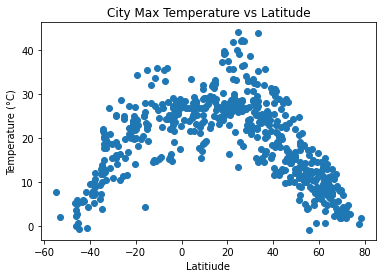

In [6]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Max Temp"])
plt.title("City Max Temperature vs Latitude")
plt.xlabel("Latitiude")
plt.ylabel("Temperature (°C)")
plt.savefig("../output_images/maxtemp_vs_lat")
plt.show()


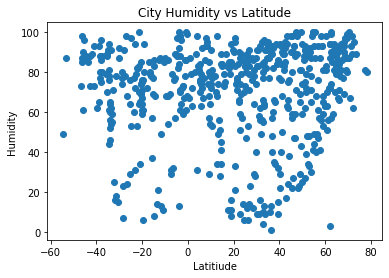

In [7]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Humidity"])
plt.title("City Humidity vs Latitude")
plt.xlabel("Latitiude")
plt.ylabel("Humidity")
plt.savefig("../output_images/humid_vs_lat")
plt.show()

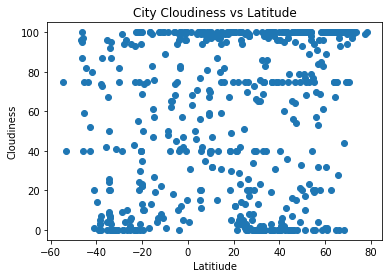

In [8]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Cloudiness"])
plt.title("City Cloudiness vs Latitude")
plt.xlabel("Latitiude")
plt.ylabel("Cloudiness")
plt.savefig("../output_images/cloud_vs_lat")
plt.show()

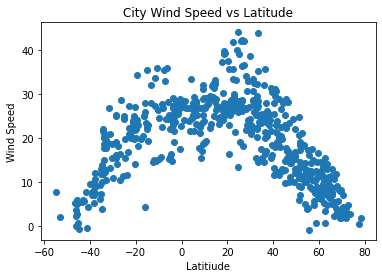

In [9]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Wind Speed"])
plt.title("City Wind Speed vs Latitude")
plt.xlabel("Latitiude")
plt.ylabel("Wind Speed")
plt.savefig("../output_images/wind_vs_lat")
plt.show()

### Linear Regression

The r-value is 0.7788583282447299


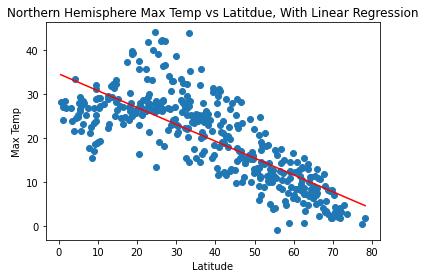

In [10]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] >= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Max Temp"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Max Temp"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Max Temp vs Latitdue, With Linear Regression")
plt.savefig("../output_images/maxtemp_vs_lat_north")
plt.show()

The r-value is 0.7453568553613148


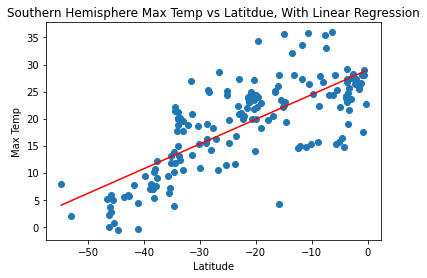

In [11]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] <= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Max Temp"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Max Temp"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Max Temp vs Latitdue, With Linear Regression")
plt.savefig("../output_images/maxtemp_vs_lat_south")
plt.show()

The r-value is 0.14749725707307615


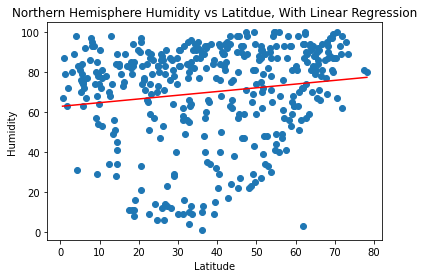

In [13]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] >= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Humidity"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Humidity"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity vs Latitdue, With Linear Regression")
plt.savefig("../output_images/humid_vs_lat_north")
plt.show()

The r-value is 0.05184286827093886


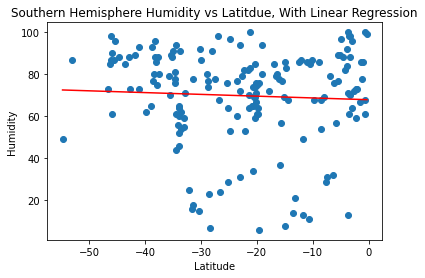

In [14]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] <= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Humidity"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Humidity"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Humidity vs Latitdue, With Linear Regression")
plt.savefig("../output_images/humid_vs_lat_south")
plt.show()

The r-value is 0.17881433062061722


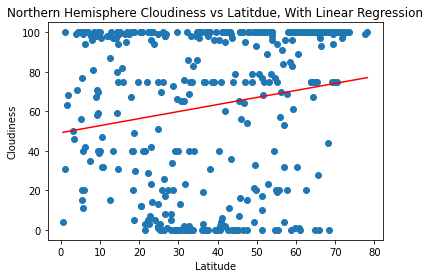

In [15]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] >= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Cloudiness"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Cloudiness"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness vs Latitdue, With Linear Regression")
plt.savefig("../output_images/cloud_vs_lat_north")
plt.show()

The r-value is 0.21272677857057168


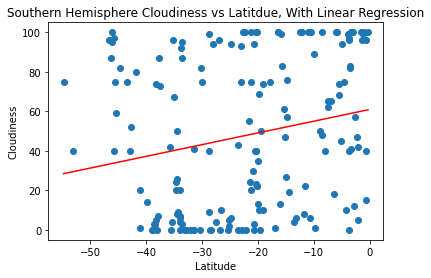

In [16]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] <= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Cloudiness"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Cloudiness"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness vs Latitdue, With Linear Regression")
plt.savefig("../output_images/cloud_vs_lat_south")
plt.show()

The r-value is 0.7788583282447299


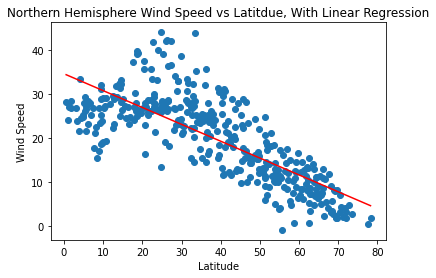

In [17]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] >= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Wind Speed"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Wind Speed"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Wind Speed vs Latitdue, With Linear Regression")
plt.savefig("../output_images/wind_vs_lat_north")
plt.show()

The r-value is 0.7453568553613148


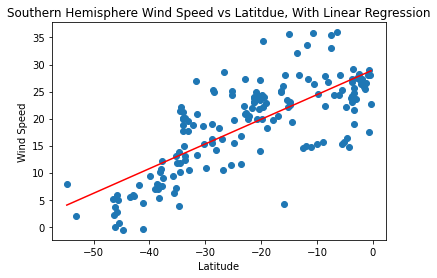

In [18]:
#Northern Hemisphere - Temp vs Lat
northern_df = city_data.loc[city_data["Lat"] <= 0,:]
x = np.linspace(northern_df["Lat"].min(), northern_df["Lat"].max(),10)
slope, intercept, r, p, se = linregress(northern_df["Lat"],northern_df["Wind Speed"])
print(f"The r-value is {np.sqrt(r**2)}")
fix, ax = plt.subplots()
ax.scatter(northern_df["Lat"],northern_df["Wind Speed"])
ax.plot(x, x*slope + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Wind Speed vs Latitdue, With Linear Regression")
plt.savefig("../output_images/wind_vs_lat_south")
plt.show()